In [1]:
#pip install pomegranate

In [39]:
#pip install pymc3

Note: you may need to restart the kernel to use updated packages.
  Created wheel for theano-pymc: filename=Theano_PyMC-1.0.11-py3-none-any.whl size=2572043 sha256=5fb667351eeaa6151f62705d74fa62e3aec67b5e54c125c4f94aacfff757b5d0
  Stored in directory: c:\users\powel\appdata\local\pip\cache\wheels\45\cd\5b\6b7f84f36d564107f0786ce959bcb7641e07c764cb9abdf222
Successfully built theano-pymc


In [55]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install pygraphviz

  Using cached pygraphviz-1.6.zip (117 kB)
  Running setup.py clean for pygraphviz
Failed to build pygraphviz
    Running setup.py install for pygraphviz: started
    Running setup.py install for pygraphviz: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\powel\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\powel\\AppData\\Local\\Temp\\pip-install-ihjfn63q\\pygraphviz\\setup.py'"'"'; __file__='"'"'C:\\Users\\powel\\AppData\\Local\\Temp\\pip-install-ihjfn63q\\pygraphviz\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\powel\AppData\Local\Temp\pip-wheel-xhe6fofy'
       cwd: C:\Users\powel\AppData\Local\Temp\pip-install-ihjfn63q\pygraphviz\
  Complete output (49 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.7
  creating build\lib.win-amd64-3.7\pygraphviz
  copying pygraphviz\agraph.py -> build\lib.win-amd64-3.7\pygraphviz
  copying pygraphviz\graphviz.py -> build\lib.win-amd64-3.7\pygraphviz
  copying pygra

In [44]:
#imports
import pandas as pd
import numpy as np
import arviz as az
import pymc3 as pm
import matplotlib.pyplot as plt
from pomegranate import *

In [3]:
#reads in the dummy tables
df1 = pd.read_excel("dummy1.xlsx");
df2 = pd.read_excel("dummy2.xlsx");

In [28]:
#we drop insignifigant columns and split the dataframe into x and y
toDrop = ['ID', 'Use_of_Video_Conferencing', 'Age','Sex','Time_Providing_Care','Race']
explanatory = ['Caregiver_for_Veteran', 'Other_caregiver','Veteran','Other', 'Hypertension_high_blood_pressure_Chronic_Conditions', 'Hyperlipidemia_high_blood_cholesterol_or_triglyceride_levels_Chronic_Conditions', 
                 'Allergies', 'sinusitis_and_other_upper_respiratory_conditions_Chronic_Conditions', 'Arthritis_Chronic_Conditions', 'Mood_Disorder_depression_and_bipolar_disorder_Chronic_Conditions', 
                'Diabetes_Type1_and_Type_2_Chronic_Conditions', 'Anxiety_Disorder_Chronic_Conditions', 'Asthma_Chronic_Conditions', 'Coronary_artery_disease_includes_myocardial_infarction_heart_attack_Chronic_Conditions', 
                'Thyroid_disorder_Chronic_Conditions', 'Chronic_obstructive_lung_disease_and_bronchiectasis_Chronic_Condition', 'Traumatic_Brain_Injury__TBI_Chronic_Conditions', 'Post_Traumatic_Stress_Disorder_PTSD_Chronic_Conditions', 
                'None_of_the_above__Chronic_Conditions', 'Caregivers_Portal_Video_Use', 'Family_members__Portal_Video_Us', 'Friends_Portal_Video_Use', 'Others_Portal_Video_Use', 'Not_using_Portal_video_Portal_Video_Use', 'Portal_Chronic_Disease_Management_Help', 
                'SMS_text_Connection_Technology_Use', 'Phone_Connection_Technology_Use', 'Video_Portal_Connection_Technology_Use', 'Other_Connection_Technology_Use']
selected1 = df1[explanatory]
selected2 = df2[explanatory]
#dropped1 = df1.drop(columns = toDrop+explanatory)
#dropped2 = df2.drop(columns = toDrop+explanatory)
#for now, we're just looking at life satisfaction
dropped1 = df1[['Life_Satisfaction']]
dropped2 = df2[['Life_Satisfaction']]

In [29]:
coding = {
    'Agree': 1,
    'StronglyAgree': 2,
    'Strongly Agree': 2,
    'StronglyDisagree': -2,
    'Strongly Disagree': -2,
    'Disagree': -1,
    'Neutral': 0,
    'Yes': 1,
    'No': -1,
    'Rarely':-1,
    'Never':-2,
    'Sometimes':1,
    'Always':2,
    '0':0,
    '1':1
}
def f(s):
    l = []
    for b in s:
        if (b in coding):
            l.append(coding[b])
        else:
            l.append(b)
    return pd.Series(l)
    

In [30]:
#makes all data numerical
xdata1 = selected1.apply(f, axis = 0)
xdata2 = selected2.apply(f, axis = 0)
ydata1 = dropped1.apply(f, axis=0)
ydata2 = dropped2.apply(f, axis=0)

In [32]:
#identifies data as being from before, or after portal usage and merges dataframes
xdata1['before']=np.full(data1.shape[0], 1)
xdata2['before']=np.full(data1.shape[0], 0)
x = pd.concat([xdata1, xdata2])
y = pd.concat([ydata1, ydata2])
x

,Caregiver_for_Veteran,Other_caregiver,Veteran,Other,Hypertension_high_blood_pressure_Chronic_Conditions,Hyperlipidemia_high_blood_cholesterol_or_triglyceride_levels_Chronic_Conditions,Allergies,sinusitis_and_other_upper_respiratory_conditions_Chronic_Conditions,Arthritis_Chronic_Conditions,Mood_Disorder_depression_and_bipolar_disorder_Chronic_Conditions,...,Family_members__Portal_Video_Us,Friends_Portal_Video_Use,Others_Portal_Video_Use,Not_using_Portal_video_Portal_Video_Use,Portal_Chronic_Disease_Management_Help,SMS_text_Connection_Technology_Use,Phone_Connection_Technology_Use,Video_Portal_Connection_Technology_Use,Other_Connection_Technology_Use,before
0,0,0,0,1,0,1,1,1,0,0,...,0,0,3,0,0,1,0,1,1,1
1,1,1,1,0,0,1,0,0,1,0,...,0,1,2,1,0,1,0,0,1,1
2,0,0,1,1,1,1,1,1,1,0,...,1,1,2,0,0,0,0,0,0,1
3,1,1,1,0,1,1,0,1,0,1,...,1,0,3,1,0,1,0,0,0,1
4,0,0,0,0,0,1,1,0,0,0,...,1,1,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,1,1,0,0,0,0
496,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
497,0,0,1,0,0,0,0,1,0,0,...,1,1,2,0,0,1,1,1,1,0
498,0,0,1,1,1,0,0,0,1,0,...,0,1,2,0,0,0,1,1,1,0


In [80]:
print(2**3)

8


In [40]:
#creates Bayesian model using data

d = pd.concat([x, y])
dtrain = d[:800]
dtest = d[:-200]
model = BayesianNetwork.from_samples(d)

MemoryError: 

In [ ]:
model.plot();

In [ ]:
blanked = dtest.copy()
blanked['Life_Satisfaction'] = np.full(blanked.shape[0], None)
prediction = model.predict(blanked)
mean = dtest["Life_Satisfaction"].mean()
rss = 0
tss = 0
correct = 0
for i in range (0, dtest.shape[0]):
    yBar = prediction['Life_Satisfaction'][i]
    yActual = dtest['Life_Satisfaction'][i]
    if (yBar == yActual):
        correct+=1
    rss += (yActual-yBar)**2
    tss += (yActual-mean)**2
percent = (float)correct/200
r2 = 1-(float)rss/tss
print("Accuracy: " + (str)(percent))
print("r^2: " + (str)(r2))

In [47]:
from pymc3.glm import GLM

with pm.Model() as model_glm:
    GLM.from_formula("Life_Satisfaction ~ Caregiver_for_Veteran + Other_caregiver + Veteran + Other + Hypertension_high_blood_pressure_Chronic_Conditions + Hyperlipidemia_high_blood_cholesterol_or_triglyceride_levels_Chronic_Conditions + Allergies + sinusitis_and_other_upper_respiratory_conditions_Chronic_Conditions + Arthritis_Chronic_Conditions + Mood_Disorder_depression_and_bipolar_disorder_Chronic_Conditions + Diabetes_Type1_and_Type_2_Chronic_Conditions + Anxiety_Disorder_Chronic_Conditions + Asthma_Chronic_Conditions + Coronary_artery_disease_includes_myocardial_infarction_heart_attack_Chronic_Conditions + Thyroid_disorder_Chronic_Conditions + Chronic_obstructive_lung_disease_and_bronchiectasis_Chronic_Condition + Traumatic_Brain_Injury__TBI_Chronic_Conditions + Post_Traumatic_Stress_Disorder_PTSD_Chronic_Conditions + None_of_the_above__Chronic_Conditions + Caregivers_Portal_Video_Use + Family_members__Portal_Video_Us + Friends_Portal_Video_Use + Others_Portal_Video_Use + Not_using_Portal_video_Portal_Video_Use + Portal_Chronic_Disease_Management_Help + SMS_text_Connection_Technology_Use + Phone_Connection_Technology_Use + Video_Portal_Connection_Technology_Use + Other_Connection_Technology_Use + before", dtrain)
    trace = pm.sample()

WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{add,no_inplace}.0
C:\Users\powel\Anaconda3\lib\site-packages\pymc3\sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{add,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{add,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: TensorConstant{[]}
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{add,n

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 513 seconds.
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{add,no_inplace}.0
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{add,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{add,no_inplace}.0
C:\Users\powel\Anaconda3\lib\site-packages\arviz\plots\traceplot.py:195: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (32), generating only 20 plots
  UserWarning,


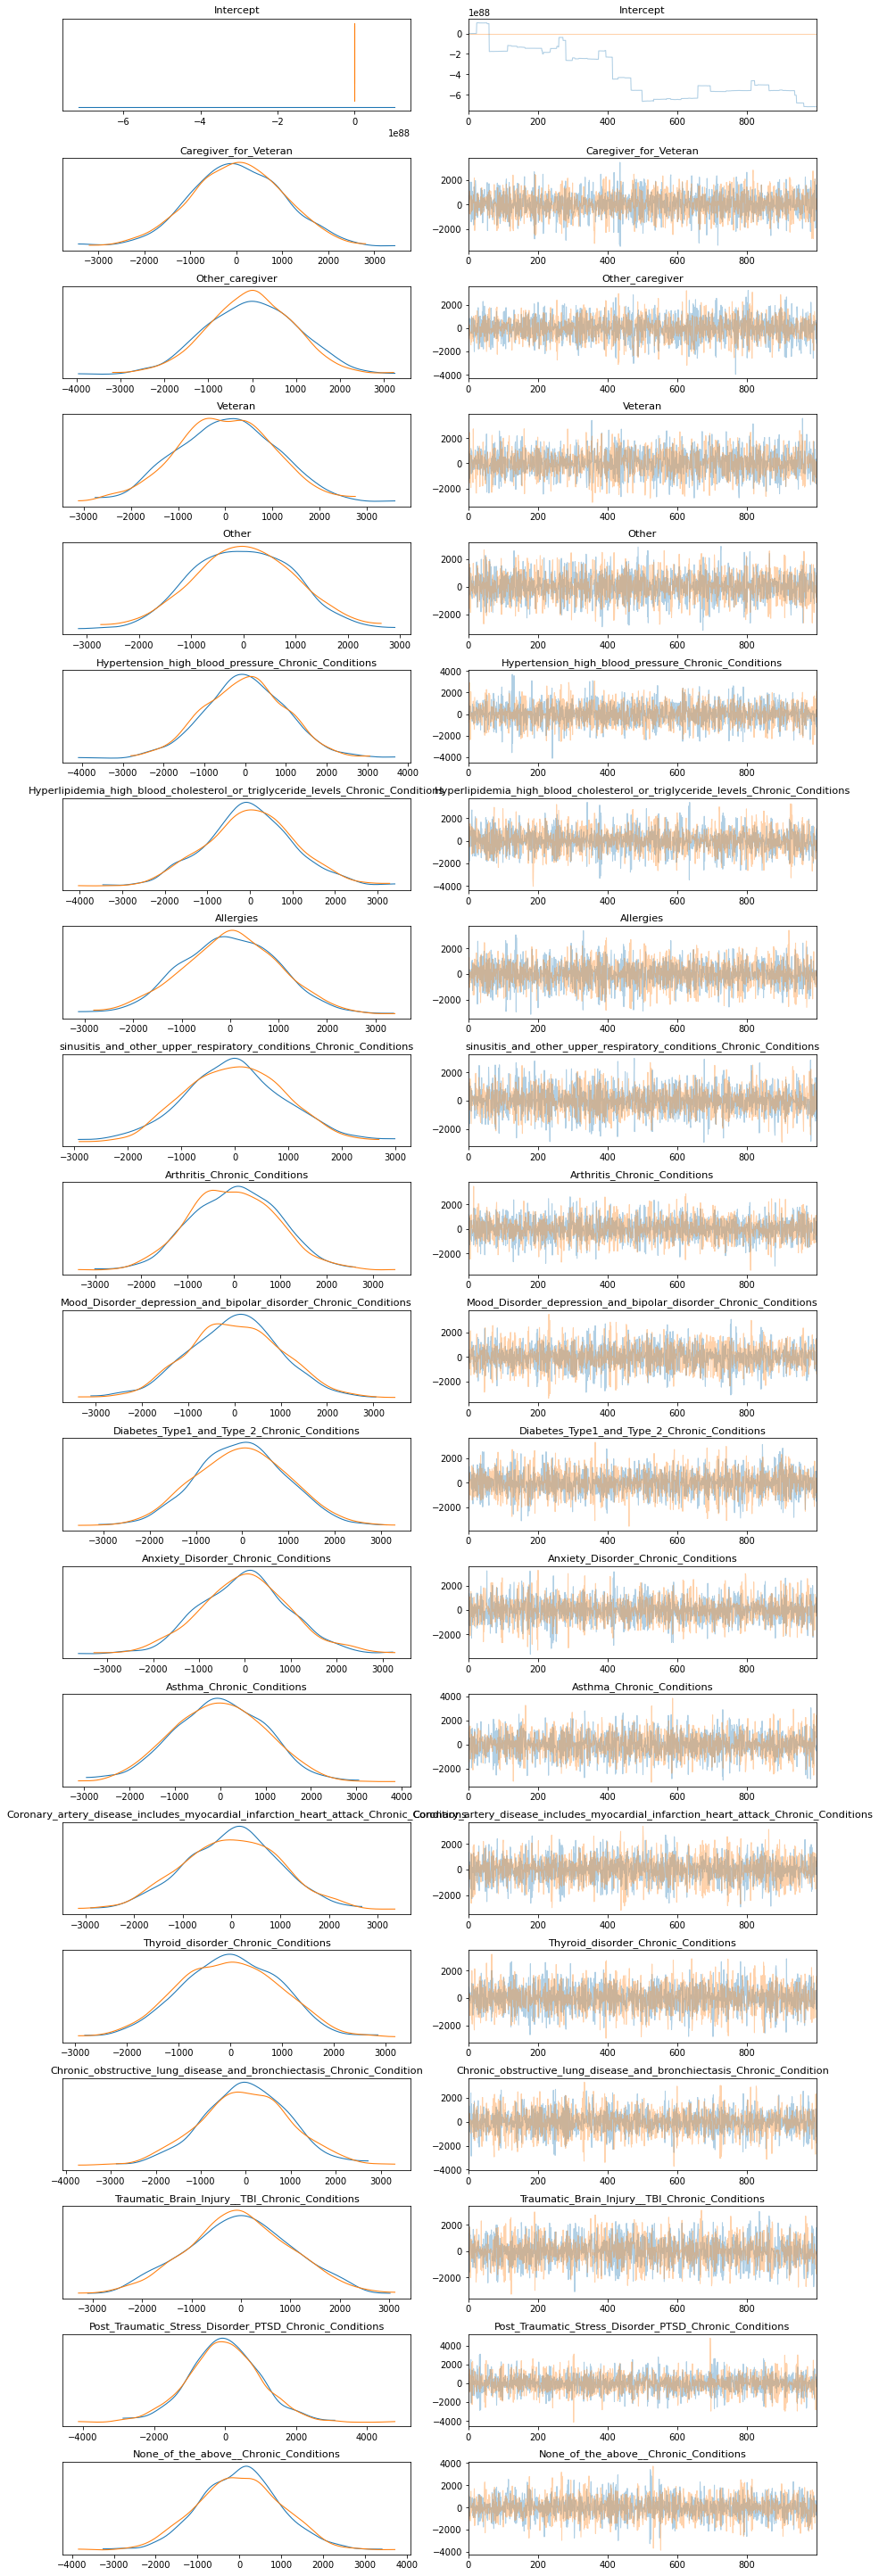

In [48]:
with model_glm:
    axes_arr = az.plot_trace(trace)
plt.draw()

In [ ]:
blanked = dtest.copy(dtest)
blanked['Life_Satisfaction'] = np.full(blanked.shape[0])
prediction = model.predict(blanked)
mean = dtest["weight"].mean()
rss = 0
tss = 0
correct = 0
for i in range (0, dtest.shape[0]):
    yBar = prediction['Life_Satisfaction'][i]
    yActual = dtest['Life_Satisfaction'][i]
    if (yBar == yActual):
        correct+=1
    rss += (yActual-yBar)**2
    tss += (yActual-mean)**2
percent = (float)correct/200
r2 = 1-(float)rss/tss
print("Accuracy: " + (str)(percent))
print("r^2: " + (str)(r2))